# Dataset 20 newsgroups
El dataset 20 Newsgroups es una colección de aproximadamente 20.000 documentos de grupos de noticias, particionados en 20 diferentes temas (aproximadamente balanceado).

Algunos temas están bastante relacionados con otros (por ejemplo comp.sys.ibm.pc.hardware y comp.sys.mac.hardware), mientras que otros son muy diferentes (por ejemplo misc.forsale y soc.religion.christian):

 - comp.graphics
 - comp.os.ms-windows.misc
 - comp.sys.ibm.pc.hardware
 - comp.sys.mac.hardware
 - comp.windows.x
 
 - rec.autos
 - rec.motorcycles
 - rec.sport.baseball
 - rec.sport.hockey	sci.crypt
 
 - sci.electronics
 - sci.med
 - sci.space
 
 - misc.forsale
 
 - talk.politics.misc
 - talk.politics.guns
 - talk.politics.mideast
 
 - talk.religion.misc
 - alt.atheism
 - soc.religion.christian


## Carga de datos
Usamos el dataset 20 newsgroups que está disponible en la biblioteca datasets de sklearn

In [2]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

Podemos chequear los nombres de las clases asociadas a cada documento con el siguiente comando

In [3]:
twenty_train.target_names #prints all the categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Inspeccionar las primeras lineas del primer documento

In [4]:
print("\n".join(twenty_train.data[0].split("\n")[:10])) #prints first 10 lines of the first data file


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


# Extracción de características
Los documentos deben primero pre procesarse para separar el texto en tokens y convertirlos al espacio de vectores. Básicamente se separa cada archivo de texto en palabras (separando por espacios) y se cuenta la cantidad de veces que ocurre cada palabra en el documento. Finalmente se le asigna a cada palabra un identificador entero.
La clase CountVectorizer es la encargada de crear los vectores de características.
El método fit_transform aprende el vocabulario y retorna una matriz Document-Term [#documentos, #features]

In [10]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

X_train_counts.shape
print(X_train_counts[0])

  (0, 86580)	1
  (0, 128420)	1
  (0, 35983)	1
  (0, 35187)	1
  (0, 66098)	1
  (0, 114428)	1
  (0, 78955)	1
  (0, 94362)	1
  (0, 76722)	1
  (0, 57308)	1
  (0, 62221)	1
  (0, 128402)	2
  (0, 67156)	1
  (0, 123989)	1
  (0, 90252)	1
  (0, 63363)	1
  (0, 78784)	1
  (0, 96144)	1
  (0, 128026)	1
  (0, 109271)	1
  (0, 51730)	1
  (0, 86001)	1
  (0, 83256)	1
  (0, 113986)	1
  (0, 37565)	1
  :	:
  (0, 4605)	1
  (0, 76032)	1
  (0, 92081)	1
  (0, 40998)	1
  (0, 79666)	1
  (0, 89362)	3
  (0, 118983)	1
  (0, 90379)	1
  (0, 98949)	1
  (0, 64095)	1
  (0, 95162)	1
  (0, 87620)	1
  (0, 114731)	5
  (0, 68532)	3
  (0, 37780)	5
  (0, 123984)	1
  (0, 111322)	1
  (0, 114688)	1
  (0, 85354)	1
  (0, 124031)	2
  (0, 50527)	2
  (0, 118280)	2
  (0, 123162)	2
  (0, 75358)	2
  (0, 56979)	3


In [6]:

count_vect.vocabulary_.get('car')

37780

In [7]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

# Clasificación

REGRESIÓN LINEAL

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

SUPPORT VECTOR MACHINES (SVM)

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

NAIVE BAYES

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb

GaussianNB(priors=None)

KNN

In [14]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Entrenamos un clasificador Naive Bayes (NB) a partir de los datos de entrenamiento

Para entrenar, todos los clasificadores poseen el método **fit** que recibe los ejemplos de entrenamiento como primer parámetro y las clases asociadas a cada uno en el segundo parámetro

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

Construimos un pipeline con todo el proceso. Los nombres 'vect', 'tfidf' y 'clf' son arbitrarios.

In [16]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=1.0))])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

Para utilizar el clasificador para identificar la clase de un conjunto de documentos nuevos se utiliza el método **predict**

In [19]:
predicted = text_clf.predict(['This is a beautiful car','I love god','I love mac and hate windows'])
print (predicted)
for i in predicted:
    print (i," = ",twenty_train.target_names[i])

[ 7 15  2]
7  =  rec.autos
15  =  soc.religion.christian
2  =  comp.os.ms-windows.misc


Evaluamos la eficiencia del clasificador con un conjunto de datos de prueba

In [20]:

twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
print ("Clases identificadas : ", predicted)
print ("Clases reales del doc: ", twenty_test.target)

import numpy as np
np.mean(predicted == twenty_test.target)

Clases identificadas :  [ 7 11  0 ...  9  3 15]
Clases reales del doc:  [ 7  5  0 ...  9  6 15]


0.7738980350504514

In [21]:
predicted == twenty_test.target

array([ True, False,  True, ...,  True, False,  True])

## Probamos con SVM

In [22]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.8238183749336165

## Estimación de parámetros

GridSearch nos permite crear una lista de parámetros para los cuales queremos evaluar la eficacia de un clasificador.

Todos los parámetros deben comenzar con el nombre del clasificador (recordar que le dimos un nombre arbitrario

Por ejemplo vect__ngram_range indica que vamos a usar unigramas y bigramas y que elija el que arroja mejores resultados

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

Ahora creamos una instancia de grid search pasando el clasificador, los parámetros y n_jobs=-1 que indica que use todos los cores disponibles de la máquina

In [25]:
# Next, we create an instance of the grid search by passing the classifier, parameters 
# and n_jobs=-1 which tells to use multiple cores from user machine.

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

Para ver los mejores scores y los parámetros corremos el siguiente código:

In [26]:
gs_clf.best_score_

0.9067526957751458

In [27]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

Podemos ver que el accuracy se incrementó a 90.6% para el clasificador bayesiano y los parámetros ‘alpha’: 0.01 del clasificador y  ‘use_idf’: True, ‘ngram_range’: (1, 2) del pre-procesamiento

Probamos lo mismo para SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(twenty_train.data, twenty_train.target)


print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

## Eliminación de stopwords

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])

## Stemming
No está incluido en sklearn, pero se puede realizar customizando el Vectorizer

In [ ]:
import nltk
nltk.download()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB())])

text_mnb_stemmed = text_mnb_stemmed.fit(twenty_train.data, twenty_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(twenty_test.data)

import numpy as np
np.mean(predicted_mnb_stemmed == twenty_test.target)

0.8114710568242167

# NLTK
 - Es una biblioteca especializada en procesamiento de lenguaje natural
 - Recursos léxicos
 - Tokenización de palabras y oraciones
 - PoS Tagging
 - Identificación de entidades nombradas (NER)
 - Técnicas de minería de texto (por ejemplo clasificación)

## Separación de oraciones

In [29]:
from nltk import word_tokenize, sent_tokenize
text = 'The quick brown fox jumed! where? Over the lazy dog.'
sentences = sent_tokenize(text)
sentences

['The quick brown fox jumed!', 'where?', 'Over the lazy dog.']

## Separación de palabras

In [30]:
for sentence in sentences:
    words = word_tokenize(sentence)
    print(words)

['The', 'quick', 'brown', 'fox', 'jumed', '!']
['where', '?']
['Over', 'the', 'lazy', 'dog', '.']


Funciona para texto de redes sociales?

In [31]:
tweet = '@mg_armentano: an example! :D http://example.com #NLP'
print(word_tokenize(tweet))

['@', 'mg_armentano', ':', 'an', 'example', '!', ':', 'D', 'http', ':', '//example.com', '#', 'NLP']


In [32]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
tweet = '@mg_armentano: an example! :D http://example.com #NLP'
print(tokenizer.tokenize(tweet))

['@mg_armentano', ':', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


## Textos de ejemplo

In [33]:
from nltk.book import *
text1

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<Text: Moby Dick by Herman Melville 1851>

Conceptualmente, un objeto **nltk.text** no es más que una lista ordenada de tokens, siendo esto la unidad mínima de un texto, simplemente palabras o signos de puntuación. 

In [34]:
text1[0:20]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar']

## Carga de textos desde url

In [35]:
from urllib import request

url = "http://www.gutenberg.org/cache/epub/3748/pg3748.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

print(type(raw))
print(len(raw))
print(raw[:75])

<class 'str'>
448614
﻿Project Gutenberg's A Journey to the Interior of the Earth, by Jules Verne


In [36]:
from nltk import word_tokenize

tokens = word_tokenize(raw)
print(type(tokens))
print(len(tokens))
print(tokens[:10])

<class 'list'>
91752
['\ufeffProject', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the']


In [37]:
import nltk
text = nltk.Text(tokens)
print(type(text))
print(len(text))
print(text[:10])

<class 'nltk.text.Text'>
91752
['\ufeffProject', 'Gutenberg', "'s", 'A', 'Journey', 'to', 'the', 'Interior', 'of', 'the']


## Búsqueda con contexto

In [38]:
text.concordance("sea")

Displaying 25 of 120 matches:
cry , `` Thalatta ! thalatta ! '' the sea ! the sea ! The deeply indented shore
halatta ! thalatta ! '' the sea ! the sea ! The deeply indented shore was lined
ood , changeable , mother , bow , and sea ? The first and the last might have s
 Iceland there should be mention of a sea of ice ; but it was quite another thi
`` Yes ; a mountain rising out of the sea . '' `` Right . That is Snæfell . '' 
urs we stopped at Kiel , close to the sea . The luggage being labelled for Cope
 there was a sharp breeze and a rough sea , a few lights appeared on shore thro
t . At last he discerned a stretch of sea . `` The Sound ! '' he cried . At our
arts , whose huge arms dilated in the sea breeze like the sails of a ship . Wha
 the green country , on the other the sea sparkled , bathed in sunlight . The S
Cape Lindness , and entered the North Sea . In two days more we sighted the coa
 unusual . I bore the troubles of the sea pretty well ; my uncle , to his own i
s perforat

## Obtener colocaciones
Las colocaciones son unidades fraseológicas de dos o más palabras que se usan muy habitualmente combinadas, más de lo que probabilísticamente se daría. Por ejemplo, en español "alto riesgo", "sin duda", "no hay problema"

In [39]:
text.collocations()

Project Gutenberg-tm; Project Gutenberg; Professor Liedenbrock;
Literary Archive; Gutenberg-tm electronic; Archive Foundation;
electronic works; Jules Verne; United States; Gutenberg Literary; Arne
Saknussemm; hundred feet; Humphry Davy; public domain; next day; Port
Gräuben; electronic work; sixteenth century; Gutenberg-tm License; set
forth


## Similitud distribucional
Permite buscar palabras que aparecen en los mismos contextos de una palabra dada

In [40]:
text.similar("sea")

earth professor raft world water way air rocks globe work time crater
waves rock compass journey shore ground gallery soil


## Palabras más comunes

In [41]:
from nltk import FreqDist
fdist1 = FreqDist(text)
print([i for i in fdist1.most_common(500) if len(i[0]) > 5])

[('Professor', 164), ('should', 97), ('little', 94), ('seemed', 90), ('before', 86), ('through', 84), ('Project', 82), ('without', 82), ('myself', 81), ('hundred', 77), ('moment', 72), ('thought', 70), ('nothing', 69), ('Liedenbrock', 66), ('replied', 66), ('surface', 64), ('leagues', 60), ('Gutenberg-tm', 55), ('against', 54), ('Iceland', 53), ('therefore', 53), ('granite', 51), ('CHAPTER', 45), ('Snæfell', 44), ('course', 43), ('Saknussemm', 43), ('between', 42), ('gallery', 42), ('looked', 40), ('passed', 39), ('almost', 37), ('enough', 37), ('Gräuben', 37), ('crater', 37), ('thousand', 36), ('centre', 36), ('himself', 35), ('reason', 35), ('rather', 35), ('return', 34), ('called', 34), ('reached', 34), ('matter', 32), ('formed', 32), ('silence', 32), ('period', 31), ('question', 31), ('carried', 31), ('together', 30), ('distance', 30), ('Icelandic', 30), ('document', 30), ('within', 30), ('passage', 30), ('certain', 29), ('longer', 29), ('hunter', 29), ('journey', 28), ('became', 2

Otras funciones interesantes de FreqDist

 - fdist.values(): Devuelve la cantidad de veces que aparece cada palabra
 - fdist.N(): Total de palabras en el texto
 - fdist[word]: Cantidad de ocurrencias de word
 - fdist.freq(word): Devuelve la frecuencia de aparación de word
 - fdist.max(): Palabra con máxima frecuencia
 - fdist.plot(): Representación gráfica

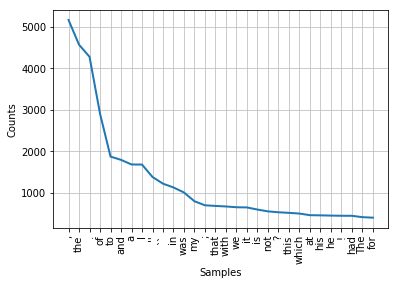

In [45]:
%matplotlib inline 
fdist1.plot(30)

## Dispersión de una palabra
Podemos también ver gráficamente como evoluciona la aparición de una palabra a lo largo del documento

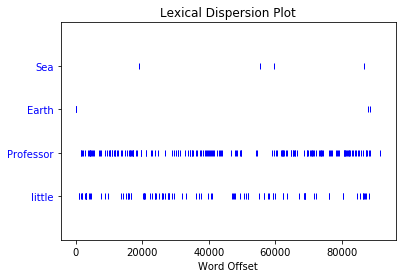

In [44]:
text.dispersion_plot(["Sea", "Earth", "Professor","little"])

## Generación de bigramas

In [46]:
list(bigrams(text))[0:15]

[('\ufeffProject', 'Gutenberg'),
 ('Gutenberg', "'s"),
 ("'s", 'A'),
 ('A', 'Journey'),
 ('Journey', 'to'),
 ('to', 'the'),
 ('the', 'Interior'),
 ('Interior', 'of'),
 ('of', 'the'),
 ('the', 'Earth'),
 ('Earth', ','),
 (',', 'by'),
 ('by', 'Jules'),
 ('Jules', 'Verne'),
 ('Verne', 'This')]

## stemmers

In [47]:
porter = nltk.PorterStemmer()
list(porter.stem(t) for t in tokens)[0:20]

['\ufeffproject',
 'gutenberg',
 "'s",
 'A',
 'journey',
 'to',
 'the',
 'interior',
 'of',
 'the',
 'earth',
 ',',
 'by',
 'jule',
 'vern',
 'thi',
 'ebook',
 'is',
 'for',
 'the']

In [48]:
lancaster = nltk.LancasterStemmer()
list(lancaster.stem(t) for t in tokens)[0:20]

['\ufeffproject',
 'gutenberg',
 "'s",
 'a',
 'journey',
 'to',
 'the',
 'intery',
 'of',
 'the',
 'ear',
 ',',
 'by',
 'jul',
 'vern',
 'thi',
 'ebook',
 'is',
 'for',
 'the']

## Lematización
A diferencia del stemming, el lematizador solo elimina el final de la palabra si la palabra resultante se encuentra en el diccionario. Esto lo hace un proceso más lento que el stemming.

In [49]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['\ufeffProject',
 'Gutenberg',
 "'s",
 'A',
 'Journey',
 'to',
 'the',
 'Interior',
 'of',
 'the',
 'Earth',
 ',',
 'by',
 'Jules',
 'Verne',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restriction',
 'whatsoever',
 '.',
 'You',
 'may',
 'copy',
 'it',
 ',',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'term',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.org',
 'Title',
 ':',
 'A',
 'Journey',
 'to',
 'the',
 'Interior',
 'of',
 'the',
 'Earth',
 'Author',
 ':',
 'Jules',
 'Verne',
 'Posting',
 'Date',
 ':',
 'December',
 '3',
 ',',
 '2010',
 '[',
 'EBook',
 '#',
 '3748',
 ']',
 'Release',
 'Date',
 ':',
 'February',
 ',',
 '2003',
 '[',
 'Last',
 'updated',
 ':',
 'August',
 '19',
 ',',
 '2011',
 ']',
 'Language',
 ':',
 'English',
 '***',
 'START',
 'OF',
 'THIS',
 'PROJECT',

----

# Matriz de confusión

confusion_matrix(y_true, y_pred) calcula la matriz de confusión a partir de las clases reales y las predichas

In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(twenty_test.target, predicted_mnb_stemmed)
conf_matrix

array([[211,   0,   0,   1,   0,   1,   0,   1,   1,   1,   1,   3,   0,
          6,   4,  71,   5,  11,   0,   2],
       [  1, 279,  12,  10,   9,  21,   3,   2,   0,   4,   0,  20,   9,
          1,  11,   3,   2,   2,   0,   0],
       [  0,  21, 271,  40,   6,  15,   1,   1,   3,   4,   2,  18,   1,
          0,   6,   3,   2,   0,   0,   0],
       [  0,   6,  17, 312,  14,   3,   8,   3,   1,   0,   2,   7,  13,
          0,   6,   0,   0,   0,   0,   0],
       [  0,   2,   7,  19, 316,   1,   8,   6,   0,   2,   2,   8,   8,
          1,   3,   0,   2,   0,   0,   0],
       [  1,  28,  12,  12,   3, 312,   1,   0,   1,   1,   0,  14,   0,
          1,   5,   2,   2,   0,   0,   0],
       [  0,   3,   3,  32,  12,   0, 292,  16,   5,   1,   5,   2,   7,
          6,   2,   3,   1,   0,   0,   0],
       [  0,   1,   0,   1,   0,   0,   4, 367,   4,   2,   2,   3,   4,
          1,   2,   0,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   3,   9, 382,   0,   0,  

Veamos un ejemplo más simple


In [51]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
confusion_matrix(y_true, y_pred)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 2]], dtype=int64)

Obtenemos algunas métricas sobre la matriz

In [52]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



NOTA: Los promedios se calculan utilizando el valor de la métrica para cada clase, pesado por el soporte

En el caso de 20 newsgroups...

In [53]:
from sklearn.metrics import classification_report
print(classification_report(twenty_test.target, predicted_mnb_stemmed, target_names=twenty_train.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.81      0.66      0.73       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.82      0.69      0.75       394
comp.sys.ibm.pc.hardware       0.69      0.80      0.74       392
   comp.sys.mac.hardware       0.86      0.82      0.84       385
          comp.windows.x       0.86      0.79      0.83       395
            misc.forsale       0.88      0.75      0.81       390
               rec.autos       0.87      0.93      0.90       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.93      0.92      0.92       397
        rec.sport.hockey       0.90      0.98      0.94       399
               sci.crypt       0.71      0.97      0.82       396
         sci.electronics       0.83      0.66      0.73       393
                 sci.med       0.92      0.79      0.85       396
         

# Hold out

Primero descargamos el dataset completo

In [54]:
twenty_all = fetch_20newsgroups(subset='all', shuffle=True)
print(len(twenty_all.data))

18846


Utilizamos el método **train_test_split** que recibe el porcentaje de datos que queremos para prueba (o entrenamiento) y devuelve los datos separados en instancias (y clases) para prueba y para entrenamiento (de forma aleatoria y estratificada)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(twenty_all.data, twenty_all.target, test_size=0.20)

print("Cantidad de datos de entrenamiento: ",len(X_train))
print("Cantidad de datos de prueba: ",len(X_test))

Cantidad de datos de entrenamiento:  15076
Cantidad de datos de prueba:  3770


In [62]:
text_clf = text_clf.fit(X_train, y_train)

In [63]:
predicted = text_clf.predict(X_test)

import numpy as np
print(np.mean(predicted == y_test))

0.8538461538461538


# Validación Cruzada

La forma más sencilla de usar la validación cruzada es utilizar función **cross_val_score** en el estimador y el conjunto de datos.

El siguiente ejemplo muestra cómo estimar la precisión de un clasificador bayesiano, ajustando un modelo y calculando el score 5 veces consecutivas (con diferentes divisiones cada vez):

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
twenty_all = fetch_20newsgroups(subset='all', shuffle=True)
X = TfidfVectorizer()
X = X.fit_transform(twenty_all.data)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, twenty_all.target, cv=5)

print(scores)                                              

[0.85456954 0.86164856 0.85623342 0.84997345 0.84742158]


Podemos calcular entonces la media y el intervalo de confianza del 95% de cada uno de los clasificadores individuales:

In [65]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.01)


Por defecto, el score calculado en cada iteración de CV es el método de score del estimador. Es posible cambiar esto usando el parámetro **score**. Por ejemplo podemos calcular la métrica F1 $$F1 = 2 * (precision * recall) / (precision + recall)$$

En este caso, en que la clasificación no es binaria, se debe calcular un promedio para las diferentes clases. Para determinar cómo se calcula este promedio, hay diferentes opciones

**micro**: Calcula la métrica globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.

**macro**: Calcula la métrica para cada etiqueta y luego calcula la media. No considera desbalance de clases.

**weighted**: Calcula la métrica para cada etiqueta, calcula el promedio y los pesa por soporte (la cantidad de instancias verdaderas para cada etiqueta. Esto lo diferencia de **macro** para tener en cuenta el desbalance de clases. Puede resultar en un valor F-score que no se encuentre entre el valor de precisión y el valor de recall

**samples**: Calcula la métrica por cada instancia, y luego calcula el promedio (solo tiene sentido para clasificación multietiqueta donde este valor difiere del accuracy.

In [66]:
scores_f1 = cross_val_score(clf, X_train_tfidf, twenty_train.target, cv=5, scoring='f1_weighted')
print(scores_f1)

[0.84216861 0.83827895 0.83653434 0.83566105 0.83873968]


Probamos diferentes tipos de validación cruzada: No estratificada, estratificada y aleatoria

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

cv_kfold = KFold(n_splits=3)
cv_strat = StratifiedKFold(n_splits=3)
cv_suffle = ShuffleSplit(n_splits=3)

scores_kfold = cross_val_score(clf, X_train_tfidf, twenty_train.target, cv=cv_kfold)
scores_strat = cross_val_score(clf, X_train_tfidf, twenty_train.target, cv=cv_strat)
scores_suffle = cross_val_score(clf, X_train_tfidf, twenty_train.target, cv=cv_suffle)

print(scores_kfold)
print(scores_strat)
print(scores_suffle)
print()
print("Accuracy K-Fold: %0.3f (+/- %0.3f)" % (scores_kfold.mean(), scores_kfold.std() * 2))
print("Accuracy Stratified K-Fold: %0.3f (+/- %0.3f)" % (scores_strat.mean(), scores_strat.std() * 2))
print("Accuracy Suffle Split: %0.3f (+/- %0.3f)" % (scores_suffle.mean(), scores_suffle.std() * 2))

[0.83457052 0.81808539 0.8236542 ]
[0.83470199 0.82374768 0.82156134]
[0.85865724 0.84452297 0.85070671]

Accuracy K-Fold: 0.825 (+/- 0.014)
Accuracy Stratified K-Fold: 0.827 (+/- 0.011)
Accuracy Suffle Split: 0.851 (+/- 0.012)


***
La función **cross_validate** difiere de **cross_val_score** de dos maneras:

1. Permite especificar múltiples métricas para la evaluación.
2. Devuelve un dict que contiene los scores de entrenamiento, tiempos de entrenamiento, tiempos de calcuar los scores y los scores de la prueba.

Si evaluamos una unica métrica (pasando un string al parámetro score, una función o None), las claves serán - ['test_score', 'fit_time', 'score_time']

Si evaluamos múltiples métricas, el valor de retorno es un dict con las siguientes claves: ['test_ <scorer1_name>', 'test_ <scorer2_name>', 'test_ <scorer ...>', 'fit_time', 'score_time']



In [68]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = MultinomialNB()
scores = cross_validate(clf, X_train_tfidf, twenty_train.target, scoring=scoring, cv=5, return_train_score=False)
scores
                   


{'fit_time': array([0.32739472, 0.27578306, 0.26429963, 0.22309256, 0.25033712]),
 'score_time': array([0.09475279, 0.09725761, 0.09023929, 0.06020212, 0.059659  ]),
 'test_precision_macro': array([0.87766701, 0.87604061, 0.87798795, 0.87708132, 0.88266551]),
 'test_recall_macro': array([0.83275965, 0.82696938, 0.82694664, 0.82367647, 0.82724057])}

## Práctica

1. Descargar el siguiente dataset:
 - http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
2. Escribir un Pipeline que permita clasificar las reviews de las películas como positivas o negativas.
3. Buscar una buena configuración de parámetros para el clasificador elegido utilizando grid search.
4. Evaluar la performance del clasificador utilizando la técnica de hold out (75/25)
5. Evaluar la performance del clasificador utilizando validación cruzada.

Nota: para cargar documentos de texto con categorías, scikit-learn provee el método **load_files(data_folder)**, que asume que dentro de "data_folder" hay una carpeta por cada clase posible, y dentro de esa carpeta se encuentran los documentos de texto plano